In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

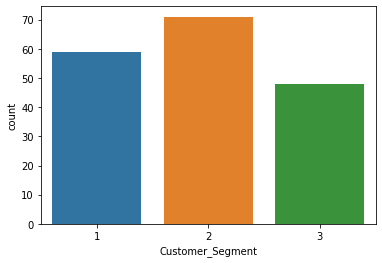

In [5]:
import seaborn as sns
sns.countplot(x="Customer_Segment", data=df)

In [6]:
y = df['Customer_Segment']
X = df.drop('Customer_Segment', axis=1)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [9]:
X_train.shape

(133, 13)

In [10]:
X_test.shape

(45, 13)

In [11]:
y_train

44     1
78     2
33     1
18     1
58     1
      ..
133    3
137    3
72     2
140    3
37     1
Name: Customer_Segment, Length: 133, dtype: int64

In [12]:
y_test

161    3
117    2
19     1
69     2
53     1
138    3
112    2
14     1
160    3
107    2
11     1
4      1
108    2
42     1
84     2
113    2
152    3
35     1
105    2
31     1
51     1
126    2
130    3
73     2
40     1
162    3
47     1
29     1
16     1
147    3
97     2
159    3
151    3
5      1
120    2
94     2
91     2
81     2
114    2
48     1
54     1
59     2
165    3
39     1
56     1
Name: Customer_Segment, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()

In [15]:
lr.fit(X_train,y_train)

C:\Users\Shantharama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
lr.score(X_test,y_test)

0.9555555555555556

In [17]:
y_pred = lr.predict(X_test)

In [18]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.9555555555555556

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        18
           2       0.89      1.00      0.94        17
           3       1.00      0.90      0.95        10

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9777777777777777

In [22]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9777777777777777

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)

0.9555555555555556

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

1.0